In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import argparse
import torch
import time

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2023-06-05 16:15:36.846902: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
data = pd.read_csv("cleaned_data.csv")
X = data.iloc[:,0:-1]
Y = data.iloc[:,-1]
y = np.zeros((len(Y), 10))
for i in range(len(Y)):
    y[i][int(Y[i])] = 1 
labels = ["C201", "C203", "C204", "C205", "C206", "C207", "C208", "C210", "DC", "MC"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [5]:
# define training hyperparameters
INIT_LR = 1e-3
BATCH_SIZE = 64
EPOCHS = 10
# define the train and val splits
TRAIN_SPLIT = 0.9
VAL_SPLIT = 1 - TRAIN_SPLIT
# set the device we will be using to train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=VAL_SPLIT, random_state=42)

In [25]:
model = Sequential()
model.add(Dense(51, input_shape=(51,), activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=125, batch_size=10)

Epoch 1/125
432/432 [==============================] - 1s 1ms/step - loss: 1.2822 - accuracy: 0.2581 - val_loss: 0.2740 - val_accuracy: 0.5354
Epoch 2/125
432/432 [==============================] - 0s 995us/step - loss: 0.2181 - accuracy: 0.5780 - val_loss: 0.1821 - val_accuracy: 0.6750
Epoch 3/125
432/432 [==============================] - 0s 948us/step - loss: 0.1526 - accuracy: 0.7405 - val_loss: 0.1483 - val_accuracy: 0.7500
Epoch 4/125
432/432 [==============================] - 0s 927us/step - loss: 0.1133 - accuracy: 0.8331 - val_loss: 0.1295 - val_accuracy: 0.8438
Epoch 5/125
432/432 [==============================] - 0s 936us/step - loss: 0.0945 - accuracy: 0.8704 - val_loss: 0.0989 - val_accuracy: 0.8917
Epoch 6/125
432/432 [==============================] - 0s 930us/step - loss: 0.0824 - accuracy: 0.8938 - val_loss: 0.0722 - val_accuracy: 0.8938
Epoch 7/125
432/432 [==============================] - 0s 965us/step - loss: 0.0704 - accuracy: 0.9208 - val_loss: 0.0651 - val_accu

432/432 [==============================] - 0s 922us/step - loss: 0.0098 - accuracy: 0.9838 - val_loss: 0.0050 - val_accuracy: 0.9979
Epoch 58/125
432/432 [==============================] - 0s 939us/step - loss: 0.0076 - accuracy: 0.9873 - val_loss: 0.0085 - val_accuracy: 0.9958
Epoch 59/125
432/432 [==============================] - 0s 986us/step - loss: 0.0138 - accuracy: 0.9812 - val_loss: 0.0084 - val_accuracy: 0.9937
Epoch 60/125
432/432 [==============================] - 0s 1ms/step - loss: 0.0103 - accuracy: 0.9875 - val_loss: 0.0074 - val_accuracy: 0.9937
Epoch 61/125
432/432 [==============================] - 0s 949us/step - loss: 0.0115 - accuracy: 0.9831 - val_loss: 0.0148 - val_accuracy: 0.9854
Epoch 62/125
432/432 [==============================] - 0s 1ms/step - loss: 0.0087 - accuracy: 0.9870 - val_loss: 0.0118 - val_accuracy: 0.9771
Epoch 63/125
432/432 [==============================] - 0s 942us/step - loss: 0.0151 - accuracy: 0.9787 - val_loss: 0.0087 - val_accuracy: 0.

432/432 [==============================] - 0s 979us/step - loss: 0.0082 - accuracy: 0.9877 - val_loss: 0.0153 - val_accuracy: 0.9625
Epoch 114/125
432/432 [==============================] - 0s 925us/step - loss: 0.0107 - accuracy: 0.9847 - val_loss: 0.0266 - val_accuracy: 0.9563
Epoch 115/125
432/432 [==============================] - 0s 965us/step - loss: 0.0065 - accuracy: 0.9914 - val_loss: 0.0030 - val_accuracy: 0.9958
Epoch 116/125
432/432 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 0.9870 - val_loss: 0.0039 - val_accuracy: 0.9979
Epoch 117/125
432/432 [==============================] - 0s 976us/step - loss: 0.0071 - accuracy: 0.9903 - val_loss: 0.1583 - val_accuracy: 0.8896
Epoch 118/125
432/432 [==============================] - 0s 905us/step - loss: 0.0150 - accuracy: 0.9810 - val_loss: 0.0039 - val_accuracy: 0.9979
Epoch 119/125
432/432 [==============================] - 0s 921us/step - loss: 0.0048 - accuracy: 0.9940 - val_loss: 0.0237 - val_accu

In [27]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

38/38 [==============================] - 0s 842us/step - loss: 0.0450 - accuracy: 0.9600
Accuracy: 96.00


In [10]:
import pickle
with open("model_nn.sav", "wb") as file:
    pickle.dump(model, file)

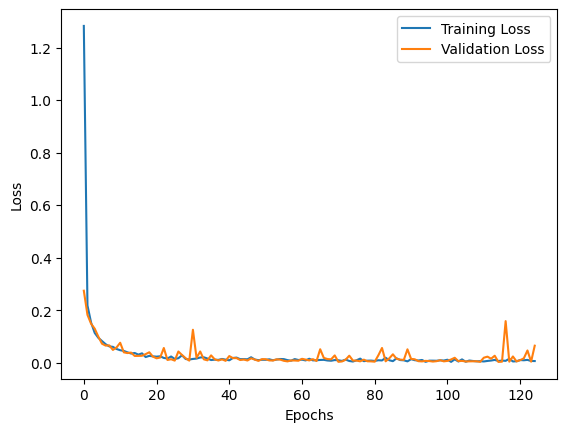

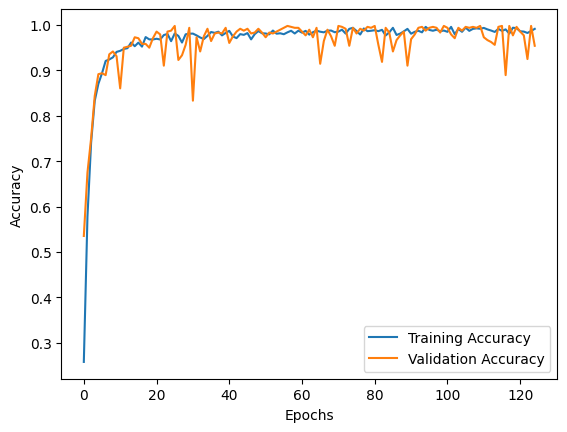

In [28]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()